<a href="https://colab.research.google.com/github/MathiasAlejandr0/Machine_Learning/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

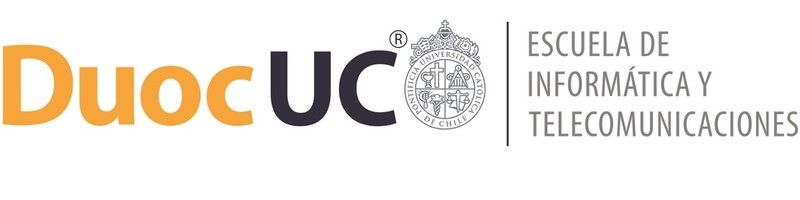

# Nueva sección

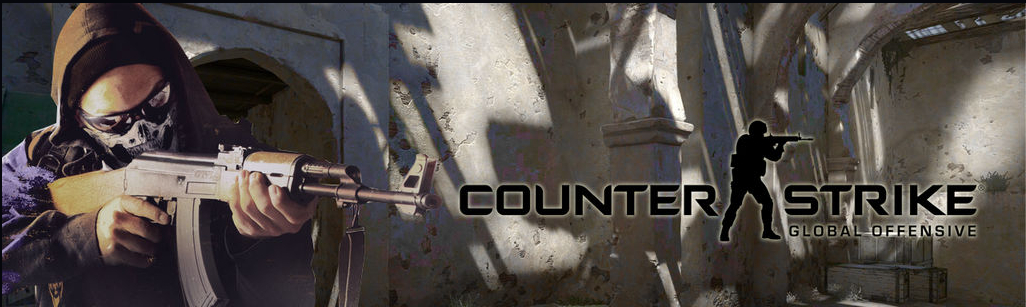

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Simón Montaña
* Mathias Jara
* Eduardo González

Docente: Giogrisrai Godoy    

Sección: 001D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding (Comprensión del negocio)

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

### 1.1 Entendimiento de los objetivos del negocio

Valve ha contratado a nuestro equipo de análisis de datos y Machine Learning para analizar información extraída de partidas de Counter Strike: Global Offensive y desarrollar modelos predictivos que permitan entender el comportamiento de los jugadores en momentos críticos del juego.

El objetivo es utilizar el análisis predictivo para:

Mejorar el entendimiento de las dinámicas de partida.

Detectar patrones de juego que puedan influir en el resultado.

Optimizar la jugabilidad y potencialmente mejorar el sistema de emparejamiento o balance del juego.

Preguntas clave de negocio:

¿Qué factores predicen si un jugador sobrevivirá o no a un round?

¿Qué variables impactan la cantidad de tiempo (TimeAlive) que un jugador logra mantenerse vivo durante una ronda?

### 1.2 Definición de objetivos del proyecto

A partir de los datos disponibles, proponemos abordar dos problemas específicos:

***1. Problema de clasificación:*** Predecir si un jugador sobrevivirá en función de características de su desempeño en la partida.

***2. Problema de regresión:*** Predecir el tiempo que un jugador se mantendrá vivo durante un evento de juego.


Objetivos específicos:


*   Construir un modelo de clasificación para predecir la supervivencia (is_alive) del jugador.

*   Construir un modelo de regresión para estimar la vida restante (hp) de un jugador.

*   Identificar las variables más relevantes que impactan en estos resultados.

*   Entregar visualizaciones claras de los patrones encontrados.

### 1.3 Hipótesis de negocio

Formulamos las siguientes hipótesis preliminares:

***Hipótesis para clasificación:***

*   Los equipos con un valor inicial de equipamiento mayor tienen más probabilidades de ganar una ronda.

***Hipótesis para regresión:***
*   Existe una relación lineal positiva entre al valor inicial del equipamiento del equipo y la cantidad total de kills por equipo en cada ronda. Es decir, a mayor inversión inicial, mayor número de kills.

Estas hipótesis serán validadas o rechazadas en etapas posteriores mediante exploración de datos y modelado.






### 1.4 Evaluación de la situación

Datos disponibles:
*  79 157 filas (cada fila representa un jugador en un momento de la partida).
*  29 columnas que describen el estado del jugador y condiciones de la partida (vida, dinero, tiempo, presencia de bomba plantada, jugadores vivos en cada equipo, etc).

Calidad de los datos:
*  El archivo fue preprocesado desde replays, con scraping y limpieza inicial.
*  Se detectaron pequeños errores de formato (líneas corruptas que fueron ignoradas).

Recursos disponibles:
*  Equipo de análisis.
*  Herramientas como librerías pandas, matplotlib, seaborn, etc.

Suposiciones y limitaciones:
*  Algunos sesgos pueden estar presentes debido al scraping o preprocesamiento inicial.
*  No todos los eventos o variables posibles del juego están representados (trabajamos con un subconjunto).


### 1.5 Criterios de éxito

Desde la perspectiva del negocio:
*   Obtener modelos predictivos útiles para mejorar el balance y la dinámica del juego.
*   Entregar a Valve un reporte que identifique los principales factores que afectan al rendimiento de los jugadores.

Desde la perspectiva técnica:
*   Lograr una precisión aceptable en el modelo de clasificación.
*   Lograr un error reducido en el modelo de regresión.
*   Proporcionar interpretabilidad mediante gráficos de variables, visualizaciones de comportamiento, etc.

## Fase 2: Data Understanding (Comprensión de los datos) DESARROLLO EDA

In [ ]:
#Importamos las liberias necesarias
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
#Cargamos el dataset para comenzar el analisis exploratorio
df = pd.read_csv('Anexo.csv', sep=';', low_memory=False)
#Mostramos los primeros datos que contiene el dataset
df.head()



,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


Este dataset contiene información detallada de partidas de Counter-Strike: Global Offensive a nivel de ronda.

Cada fila representa una ronda individual dentro de un partido (MatchId).

Las columnas indican el mapa (Map), los equipos (Team, InternalTeamId), el resultado de la ronda (RoundWinner) y del partido (MatchWinner).

También hay datos sobre si el jugador sobrevivió (Survived), si hubo anomalías (AbnormalMatch), y estadísticas de kills por ronda (RoundKills, RoundFlankKills, RoundHeadshots), asistencias (RoundAssists), y el valor del equipamiento inicial (RoundStartingEquipmentValue, TeamStartingEquipmentValue).

Finalmente, se incluyen estadísticas acumuladas a nivel de partido (MatchKills, MatchFlankKills, MatchAssists, MatchHeadshots).

In [ ]:
#revisamos cuantas filas y columnas tiene nuestro dataset
df.shape


(79157, 30)

79,157 filas: Representa el número total de registros o entradas (en este caso, rondas individuales) en el dataset.
30 columnas: Representa el número total de variables o características diferentes registradas para cada ronda.

In [ ]:
#revisamos los nombres de las columnas y sus tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Este resumen de df.info() da una vista general de la estructura del dataset:

Lista todas las columnas (#, Column).
Para cada columna, muestra cuántos valores no son nulos (Non-Null Count), lo que ayuda a identificar datos faltantes.
Indica el tipo de dato de cada columna (Dtype), como int64 (enteros), object (generalmente texto), bool (verdadero/falso) y float64 (números decimales).
Confirma el número total de filas (RangeIndex: 79157 entries) y columnas (total 30 columns).
Resume la cantidad de columnas por tipo de dato y el uso de memoria.

In [ ]:
#Estadísticas básicas para columnas numéricas
df.describe()


,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


Este resultado de df.describe() proporciona estadísticas descriptivas clave solo para las columnas numéricas del dataset:

count: Número de valores no nulos.
mean: El promedio de los valores.
std: La desviación estándar, que mide la dispersión de los datos.
min: El valor mínimo.
25%, 50%, 75%: Los cuartiles, que dividen los datos en rangos (el 50% es la mediana).
max: El valor máximo.
Esto te permite entender rápidamente la distribución, el centro y la variabilidad de las métricas numéricas como kills, asistencias, valor de equipamiento, etc., a lo largo de todas las rondas registradas.

In [ ]:
#Revisamos si existen valores nulos
df.isnull().sum()


,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


Este resultado de df.isnull().sum() muestra el número total de valores nulos (faltantes) en cada columna del DataFrame.

La mayoría de las columnas tienen 0, lo que significa que no tienen valores faltantes.
Identifica que la columna Team tiene 2 valores nulos.
La columna MatchWinner tiene 1 valor nulo.
Esta información es crucial para la fase de limpieza de datos, ya que nos muestra exactamente dónde y cuántos datos faltan para decidir cómo manejarlos.

Análisis de valores faltantes

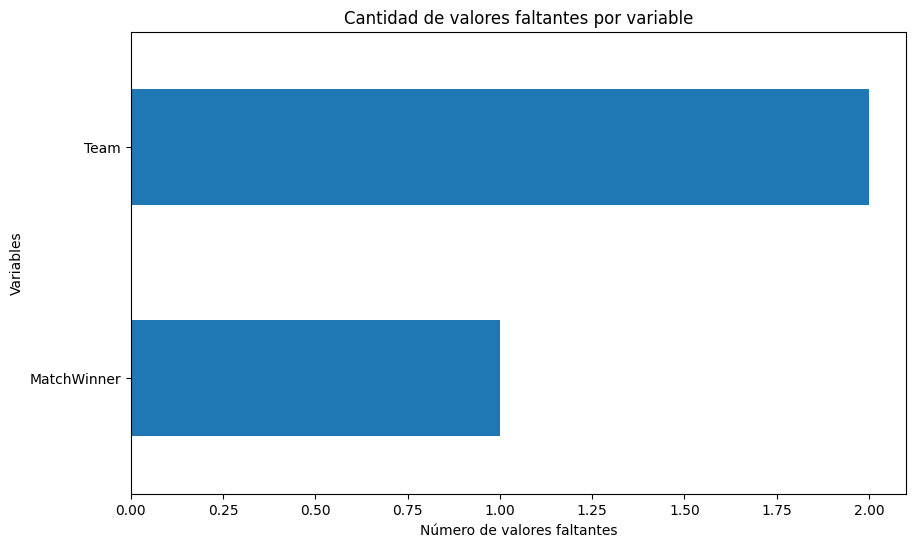

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    plt.figure(figsize=(10,6))
    missing.sort_values().plot(kind='barh')
    plt.title('Cantidad de valores faltantes por variable')
    plt.xlabel('Número de valores faltantes')
    plt.ylabel('Variables')
    plt.show()
else:
    print('No hay valores faltantes en el dataset.')

identificamos valores faltantes en un DataFrame df. Calcula la cantidad de valores nulos por columna y filtra las que tienen al menos un dato faltante. Si hay valores faltantes, genera un gráfico de barras horizontal mostrando el número de datos faltantes por variable, con un título y etiquetas. Si no hay valores faltantes, imprime un mensaje indicando que el dataset está completo. Es útil para visualizar y manejar datos incompletos en análisis exploratorios.


In [ ]:
#revisamos el número de valores únicos por columna para ver las categorias
df.nunique()


,0
Unnamed: 0,79157
Map,4
Team,2
InternalTeamId,2
MatchId,333
RoundId,36
RoundWinner,3
MatchWinner,2
Survived,2
AbnormalMatch,1


df.nunique() muestra el número de valores únicos en cada columna.

Es muy útil para identificar variables categóricas: aquellas con un número reducido de valores únicos (como Map, Team, RoundWinner, MatchWinner, Survived, AbnormalMatch).
Las columnas con muchos valores únicos (Unnamed: 0, MatchId, TimeAlive, TravelledDistance, etc.) son probablemente identificadores o variables continuas/detalladas, no categóricas en el mismo sentido.
Las columnas relacionadas con estadísticas de rondas y partidos (RoundKills, MatchKills, etc.) muestran el rango de posibles resultados.
ayuda a comprender la diversidad de valores dentro de cada característica y a distinguir entre variables categóricas y numéricas/identificadoras.

Distribución de Variables Numéricas

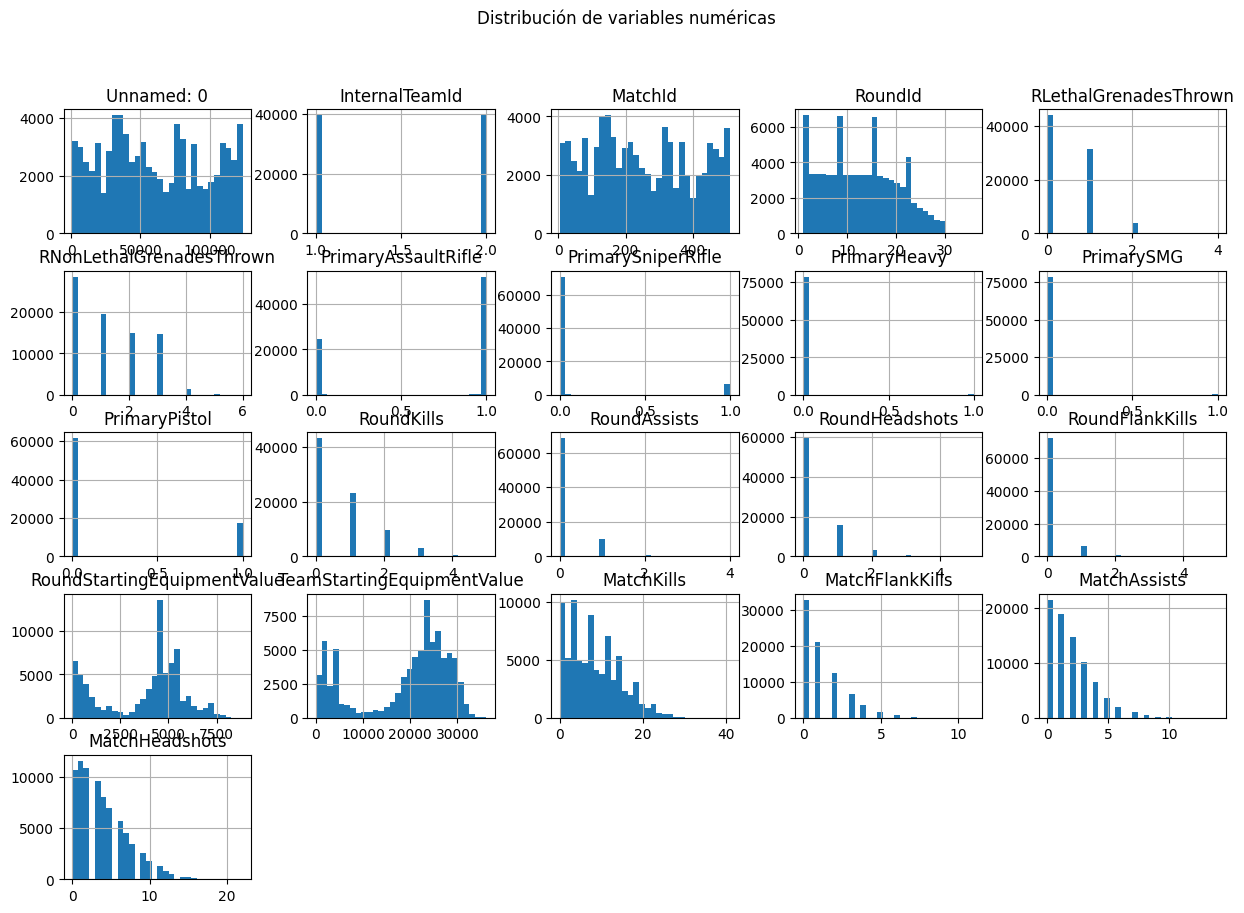

In [ ]:
df.hist(figsize=(15,10), bins=30)
plt.suptitle('Distribución de variables numéricas')
plt.show()

histogramas para todas las variables numéricas de un DataFrame df. Cada histograma muestra la distribución de una variable específica, permitiendo analizar patrones, sesgos, y rangos. Los parámetros figsize y bins ajustan el tamaño de la figura y el número de intervalos. Se agrega el título general "Distribución de variables numéricas". Es útil para identificar tendencias y posibles anomalías en los datos.


Matriz de correlaciones (columnas numéricas)

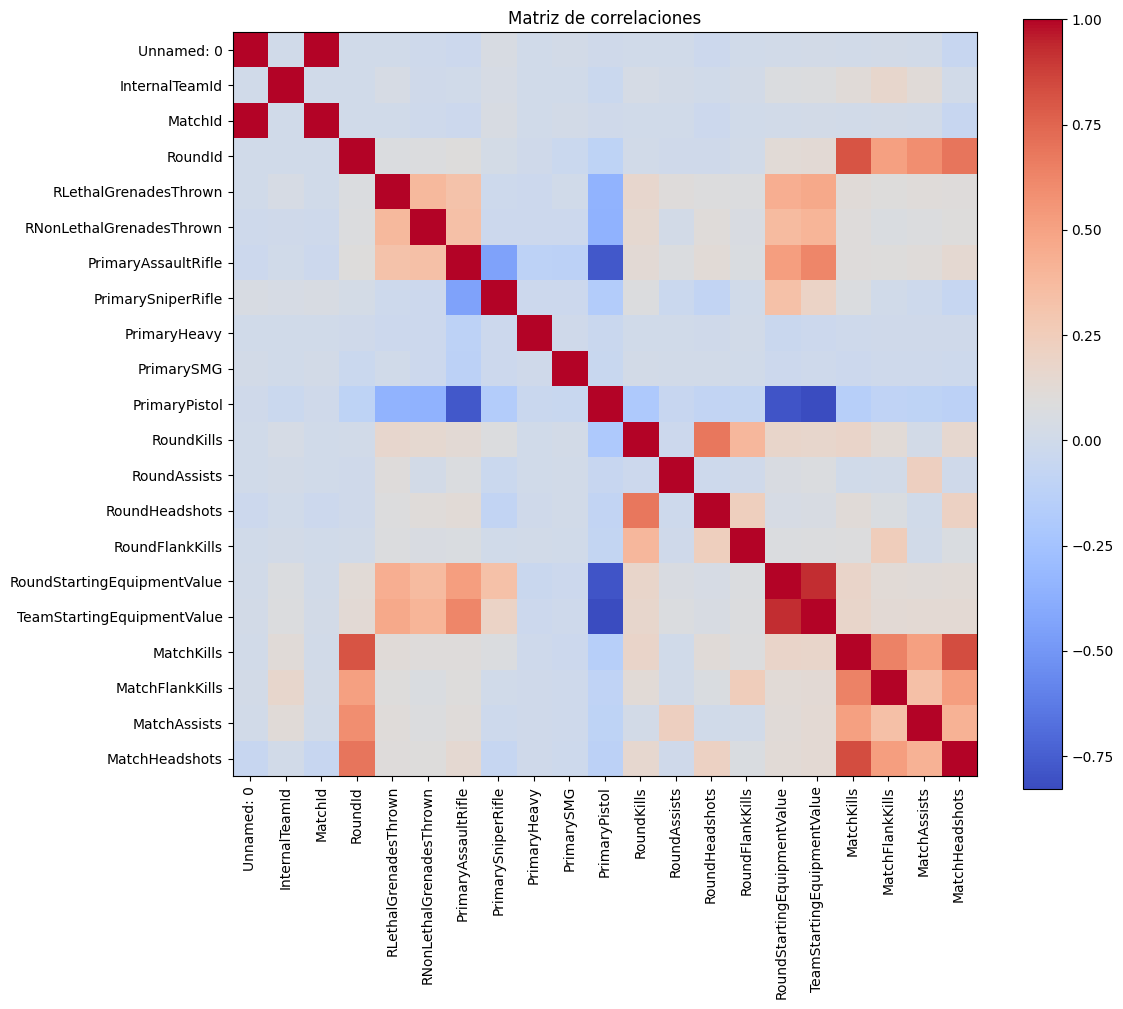

In [ ]:
# Solo columnas numéricas para la correlación
df_numeric = df.select_dtypes(include=['number'])

# Matriz de correlaciones
corr = df_numeric.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Matriz de correlaciones')
plt.show()


seleccionamos únicamente las columnas numéricas del DataFrame df para calcular su matriz de correlaciones, que mide cómo están relacionadas entre sí las variables numéricas. Utiliza plt.imshow para mostrar esta matriz como un mapa de calor con colores que van de azul (correlación negativa) a rojo (correlación positiva). Incluye etiquetas para los nombres de las variables en los ejes y un título descriptivo. Este gráfico es valioso para analizar la relación entre variables, identificar patrones y tomar decisiones en modelos predictivos o análisis exploratorios.


Análisis de outliers

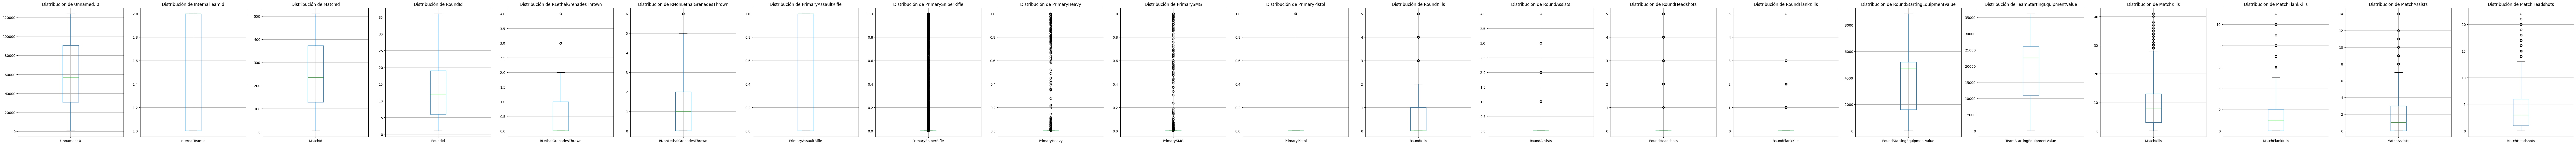

In [ ]:
# Mostrar boxplots de todas las variables numéricas

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Crear subplots dinámicos
fig, axes = plt.subplots(nrows=1, ncols=len(df_numeric.columns), figsize=(5 * len(df_numeric.columns), 6))

# Si hay solo una columna, axes no es un array
if len(df_numeric.columns) == 1:
    axes = [axes]

# Generar un boxplot para cada columna
for i, column in enumerate(df_numeric.columns):
    df_numeric.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')

plt.tight_layout()
plt.show()


Primero selecciona las columnas numéricas y crea subplots dinámicos dependiendo de cuántas variables hay. Si hay una sola variable, ajusta los subplots para evitar errores. Para cada variable, genera un boxplot que muestra su distribución, posibles valores atípicos y rango intercuartil. Los gráficos se titulan con el nombre de la variable y se organizan para una mejor visualización. Es útil para identificar outliers y entender la variabilidad de los datos numéricos.

## Fase 3: Data Preparation (Preparación de los datos)

In [ ]:
# CARGA DE LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   name=fn
df = pd.read_csv(name, sep=";")

Saving Anexo.csv to Anexo (1).csv


<ipython-input-57-aa8cf146c069>:10: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


preparacion del dataset para manejo y limpieza de los datos


In [ ]:
from sklearn.model_selection import train_test_split


se utiliza para dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para pruebas. Esto es esencial para evaluar modelos de aprendizaje automático y evitar sobreajuste.

In [ ]:
from sklearn.linear_model import LinearRegression

implementa un modelo de regresión lineal, ideal para encontrar la relación entre variables independientes (X) y dependientes (y). Se utiliza para predecir valores continuos basados en una ecuación lineal.

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


calcula el número de valores faltantes (NaN) en cada columna del DataFrame df. En este caso:
- La mayoría de las columnas no tienen valores faltantes (suma igual a 0).
- La columna Team tiene 2 valores faltantes.
- La columna MatchWinner tiene 1 valor faltante.
- Esto sugiere que hay datos incompletos en estas columnas que podrían necesitar limpieza o imputación antes de realizar análisis o entrenar modelos.




In [ ]:
# identificar porcentaje de datos faltantes del total general

train = df
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

,0
MatchWinner,0.000013
Team,0.000025


calcula el porcentaje de valores faltantes (NaN) en cada columna del DataFrame df en relación al total de filas y muestra solo las columnas que tienen valores faltantes. Aquí está el desglose:
- train.isnull().sum()/len(train) calcula la proporción de valores faltantes dividiendo el número total de NaN por el número total de filas.
- miss = miss[miss > 0] filtra las columnas donde el porcentaje de valores faltantes es mayor a 0.
- miss.sort_values(inplace=True) ordena las columnas por porcentaje de valores faltantes en orden ascendente.
- El resultado muestra que:- La columna MatchWinner tiene aproximadamente un 0.0013% de valores faltantes.
- La columna Team tiene aproximadamente un 0.0025% de valores faltantes.





In [ ]:
# Asignar DataFrame 2 PARA NO ALTERAR EL ORIGINAL

df3 = df.copy()


# Limpiamos los nulos

df3 = df3[df3.MatchWinner.notnull()]
df3 = df3[df3.RoundWinner.notnull()]
df3 = df3[df3.Team.notnull()]

## Utillizar las técnicas de transformación necesarias, ya sea de scaling normalización o encoding para dejar listos los datos para la fase de modeling
## Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


## estandarizar valored de "MatchWinner"
df3.MatchWinner.replace({True:1,False:0}, inplace=True)
## estandarizar valores de "RoundWinner"
df3.RoundWinner.replace({True:'True','False4':'False',False:'False'}, inplace=True)
## Encode labels para "RoundWinner".
df3['RoundWinner'] = label_encoder.fit_transform(df3['RoundWinner'])

## Encode Label para "Team"
df3['Team'] = label_encoder.fit_transform(df3['Team'])
df3['Map'] = label_encoder.fit_transform(df3['Map'])
df3['Survived'] = label_encoder.fit_transform(df3['Survived'])
df3['AbnormalMatch'] = label_encoder.fit_transform(df3['AbnormalMatch'])
# eliminamos los puntos del string
df3['FirstKillTime'] = df3['FirstKillTime'].apply(lambda x: float(x.split()[0].replace('.', '')))
# transformamos a numérico
df3['FirstKillTime'] = pd.to_numeric(df3['FirstKillTime'])
# eliminamos los puntos del string
df3['TimeAlive'] = df3['TimeAlive'].apply(lambda x: float(x.split()[0].replace('.', '')))
# transformamos a numérico
df3['TimeAlive'] = pd.to_numeric(df3['TimeAlive'])
# eliminamos los puntos del strin lo g
#df3['TravelledDistance'] = df3['TravelledDistance'].apply(lambda x: float(x.split()[0].replace('.', '')))
# transformamos a numérico
#df3['TravelledDistance'] = pd.to_numeric(df3['TravelledDistance'])

<ipython-input-62-c0553f11c44f>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3.MatchWinner.replace({True:1,False:0}, inplace=True)
<ipython-input-62-c0553f11c44f>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.MatchWinner.replace({True:1,False:0}, inplace=True)
<ipython-input-62-c0553f

Duplicación del DataFrame: Se crea una copia (df3 = df.copy()) para mantener los datos originales intactos.
Eliminación de valores nulos: Filtra filas con valores nulos en las columnas MatchWinner, RoundWinner y Team.
Codificación y estandarización:
MatchWinner convierte valores booleanos a 1 (True) y 0 (False).
RoundWinner codifica valores inconsistentes en True y False antes de ser etiquetados numéricamente con LabelEncoder.
Las columnas Team, Map, Survived, y AbnormalMatch también se convierten a valores numéricos mediante LabelEncoder.
En FirstKillTime y TimeAlive, elimina puntos del texto, convierte a float y luego a valores numéricos.
Aparecen FutureWarnings sobre operaciones "inplace" y comportamiento de pandas en versiones futuras, sugiriendo modificar el método de reemplazo para evitar problemas.



In [ ]:
df3.info()
df3.TravelledDistance.unique()

<class 'pandas.core.frame.DataFrame'>
Index: 79154 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79154 non-null  int64  
 1   Map                          79154 non-null  int64  
 2   Team                         79154 non-null  int64  
 3   InternalTeamId               79154 non-null  int64  
 4   MatchId                      79154 non-null  int64  
 5   RoundId                      79154 non-null  int64  
 6   RoundWinner                  79154 non-null  int64  
 7   MatchWinner                  79154 non-null  int64  
 8   Survived                     79154 non-null  int64  
 9   AbnormalMatch                79154 non-null  int64  
 10  TimeAlive                    79154 non-null  float64
 11  TravelledDistance            79154 non-null  object 
 12  RLethalGrenadesThrown        79154 non-null  int64  
 13  RNonLethalGrenadesThr

array(['10.083.140.737.457.000', '60.960.883.184.688.400',
       '5.642.252.383.582.750', ..., '6.005.168.938.274.500',
       '27.987.628.542.398.100', '9.867.724.708.696.010'], dtype=object)

El DataFrame df3 contiene 79,154 filas y 30 columnas, con un tamaño de memoria de 18.7+ MB y sin valores nulos. La mayoría de las columnas son de tipo numérico (int64 y float64), excepto TravelledDistance, que es de tipo object. Los valores únicos en TravelledDistance están formateados como cadenas con puntos separando los dígitos, por ejemplo, '10.083.140.737.457.000'. Para trabajar con estos datos en análisis o modelado, será necesario realizar una limpieza de esta columna, convirtiendo los valores a un formato numérico adecuado para su procesamiento. Esto permitirá que los datos sean más funcionales en operaciones estadísticas o para entrenar modelos de machine learning.



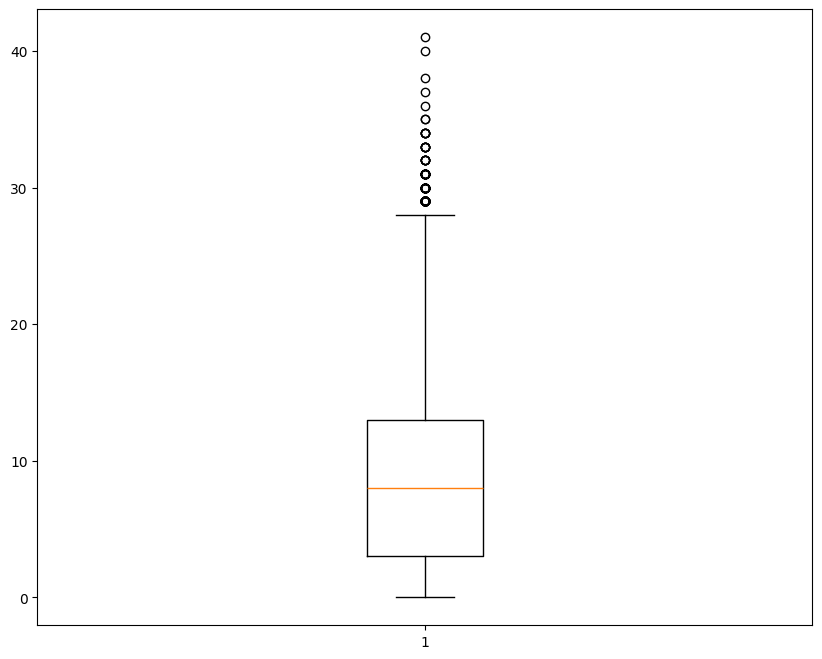

In [ ]:
plt.boxplot(list(df['MatchKills']))
plt.show()

 diagrama de caja (boxplot) usando plt.boxplot para visualizar la distribución de los valores de la columna MatchKills del DataFrame df. Este gráfico muestra información clave como:
- La mediana de los datos, representada por la línea naranja dentro de la caja.
- El rango intercuartílico (IQR), que es la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3), delimitado por los bordes de la caja.
- Los "bigotes" del boxplot, que indican los valores mínimos y máximos dentro de 1.5 veces el IQR.
- Los valores atípicos, representados como puntos fuera de los bigotes, que son extremos en la distribución.




In [ ]:
# Remover columnas no necesarias

#df3.columns
del df3['Unnamed: 0']
del df3['AbnormalMatch']
del df['RoundId']
del df3['MatchAssists']
del df3['MatchFlankKills']
del df3['RoundFlankKills']
#del df3["Map"]
del df3["Survived"]
#del df3["TimeAlive"]
del df3["TravelledDistance"]
del df3["FirstKillTime"]
df3.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'TimeAlive', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchHeadshots'],
      dtype='object')

elimina columnas no necesarias del DataFrame df3 utilizando el comando del. Esto incluye columnas como Unnamed: 0, AbnormalMatch, MatchAssists, MatchFlankKills, RoundFlankKills, Survived, TravelledDistance y FirstKillTime. Después de la limpieza, df3.columns muestra que el DataFrame ahora tiene 22 columnas seleccionadas, relevantes para el análisis o modelado. Las columnas restantes contienen información útil, como Map, Team, MatchWinner, TimeAlive, valores relacionados con armas, kills y estadísticas del equipo. Esto simplifica el DataFrame, enfocándose solo en los datos importantes.


In [ ]:
df3.describe()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,TimeAlive,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchHeadshots
count,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,7.915400e+04,79154.000000,79154.000000,...,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000,79154.000000
mean,1.305695,0.500177,1.500000,250.534376,12.765899,0.499874,0.469187,1.213436e+16,0.498673,1.258104,...,0.005964,0.007034,0.221783,0.671362,0.146183,0.301564,3778.153347,18890.255704,8.511850,3.858592
std,1.001169,0.500003,0.500003,149.552937,7.432717,0.500003,0.499053,1.435135e+16,0.597989,1.184906,...,0.075498,0.082379,0.415448,0.881808,0.385608,0.578851,2111.287720,9743.166727,6.195036,3.246762
min,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,128.000000,6.000000,0.000000,0.000000,4.419176e+15,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,1.000000
50%,1.000000,1.000000,1.500000,236.000000,12.000000,0.000000,0.000000,7.660139e+15,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,3.000000
75%,2.000000,1.000000,2.000000,373.000000,19.000000,1.000000,1.000000,1.080375e+16,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,6.000000
max,3.000000,1.000000,2.000000,511.000000,36.000000,1.000000,1.000000,6.398288e+16,4.000000,6.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,8850.000000,36150.000000,41.000000,22.000000


El resultado de df3.describe() muestra estadísticas resumidas de las 22 columnas numéricas del DataFrame. Incluye métricas como el recuento (count), promedio (mean), desviación estándar (std), mínimo (min), y percentiles (25%, 50%, 75%). Por ejemplo, la columna MatchKills tiene un promedio de 8.51, un máximo de 41, y su distribución tiene una desviación estándar de 6.19. Estas estadísticas son útiles para entender la distribución de los datos, detectar posibles valores extremos y determinar rangos relevantes para el análisis.


In [ ]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Map,79154.0,1.305695e+00,1.001169e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
Team,79154.0,5.001769e-01,5.000031e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
InternalTeamId,79154.0,1.500000e+00,5.000032e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,2.000000e+00
MatchId,79154.0,2.505344e+02,1.495529e+02,4.0,1.280000e+02,2.360000e+02,3.730000e+02,5.110000e+02
RoundId,79154.0,1.276590e+01,7.432717e+00,1.0,6.000000e+00,1.200000e+01,1.900000e+01,3.600000e+01
RoundWinner,79154.0,4.998737e-01,5.000031e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
MatchWinner,79154.0,4.691866e-01,4.990528e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
TimeAlive,79154.0,1.213436e+16,1.435135e+16,0.0,4.419176e+15,7.660139e+15,1.080375e+16,6.398288e+16
RLethalGrenadesThrown,79154.0,4.986735e-01,5.979887e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
RNonLethalGrenadesThrown,79154.0,1.258104e+00,1.184906e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00


resumen estadístico transpuesto del DataFrame df3. Cada fila corresponde a una columna del DataFrame, proporcionando estadísticas clave: el total de datos (count), el promedio (mean), la desviación estándar (std), y los valores mínimo (min), percentiles (25%, 50%, 75%) y máximo (max). Por ejemplo, la columna MatchKills tiene una media de 8.51, un máximo de 41 y un valor mínimo de 0. Estas métricas son útiles para entender la distribución de los datos y detectar valores extremos o características relevantes para un análisis más detallado.


In [ ]:
matriz_de_correlaciones = df3.corr()

matriz_de_correlaciones

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,TimeAlive,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchHeadshots
Map,1.000000,0.000561,-0.000013,0.038330,-0.000629,-0.000036,0.009156,0.026545,-0.029932,-0.088078,...,0.014061,-0.004411,0.015082,0.002262,-0.004097,-0.006670,-0.009081,-0.009854,0.007848,-0.012509
Team,0.000561,1.000000,-0.216666,-0.000618,0.000208,0.153498,0.050754,0.002891,-0.155113,0.039672,...,-0.063636,-0.002072,0.053180,-0.087306,-0.064645,-0.011097,-0.187495,-0.203237,-0.013682,-0.018114
InternalTeamId,-0.000013,-0.216666,1.000000,0.000048,0.000007,-0.067388,-0.079439,-0.003983,0.039127,-0.005395,...,0.006338,0.004037,-0.032326,0.033081,0.019494,0.006111,0.067656,0.073309,0.109546,0.008845
MatchId,0.038330,-0.000618,0.000048,1.000000,0.001391,0.000213,-0.013439,0.007001,0.002992,-0.009301,...,0.003764,0.018112,-0.002737,0.003247,0.003174,-0.023330,0.013200,0.014345,0.007954,-0.052418
RoundId,-0.000629,0.000208,0.000007,0.001391,1.000000,0.000393,-0.019087,0.004909,0.065315,0.073264,...,-0.003979,-0.029691,-0.107003,0.009114,-0.002522,-0.003371,0.117582,0.127408,0.807490,0.688210
RoundWinner,-0.000036,0.153498,-0.067388,0.000213,0.000393,1.000000,0.229544,0.021585,-0.222467,-0.142072,...,0.000224,-0.030094,0.272089,-0.269227,-0.121881,-0.154698,-0.302564,-0.327825,-0.084646,-0.064040
MatchWinner,0.009156,0.050754,-0.079439,-0.013439,-0.019087,0.229544,1.000000,0.008250,-0.152943,-0.087329,...,0.011191,-0.029343,0.138715,-0.107745,-0.060199,-0.067328,-0.175732,-0.190397,-0.186304,-0.149794
TimeAlive,0.026545,0.002891,-0.003983,0.007001,0.004909,0.021585,0.008250,1.000000,-0.056881,-0.096010,...,-0.001088,0.003945,0.052594,-0.046421,-0.001850,-0.030052,-0.036113,-0.037864,-0.002320,-0.004109
RLethalGrenadesThrown,-0.029932,-0.155113,0.039127,0.002992,0.065315,-0.222467,-0.152943,-0.056881,1.000000,0.382638,...,-0.023268,0.003282,-0.348562,0.162704,0.093736,0.080357,0.438818,0.466505,0.110567,0.092959
RNonLethalGrenadesThrown,-0.088078,0.039672,-0.005395,-0.009301,0.073264,-0.142072,-0.087329,-0.096010,0.382638,1.000000,...,-0.027060,-0.026532,-0.352810,0.148652,0.021304,0.100793,0.368172,0.403796,0.099600,0.092516


El cálculo de la matriz de correlación (df3.corr()) evalúa las relaciones lineales entre las columnas numéricas del DataFrame df3. Los valores varían de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta), siendo 0 la ausencia de correlación.
Por ejemplo:
- MatchKills y MatchHeadshots tienen una correlación positiva alta (0.83), indicando que a mayor cantidad de kills, mayor probabilidad de headshots.
- RoundId y MatchKills están fuertemente correlacionados (0.81), lo que sugiere que el número de rounds influye directamente en el total de kills en un match.
- Otras columnas, como Map y RoundWinner, muestran correlaciones cercanas a 0, indicando poca o ninguna relación entre estas variables.




<Axes: >

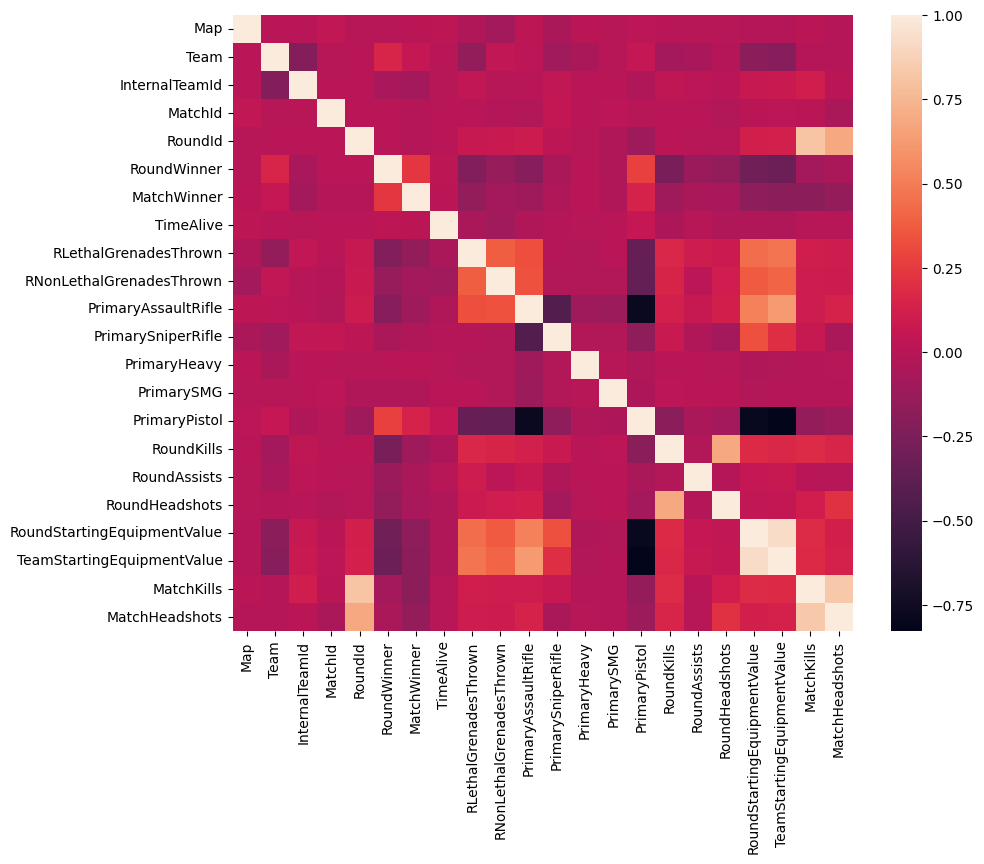

In [ ]:
# gráfico para visualizar  correlación
sns.heatmap(matriz_de_correlaciones)

# mirando el heatmap podemos apreciar que mientras más alto el valor de TeamStartingEquipmentValue y
#RoundStartingEquipmentValue. la correlación es positiva con PrimaryAssaultRifle, y negativa con PrimaryPistol.
# ((correlación directa positiva PrimaryAssaultRifle),(correlacion inversa negativa con PrimaryPistol))

 mapa de calor que visualiza la matriz de correlación de las variables del DataFrame. Los ejes (x e y) representan las columnas numéricas, mientras que los colores indican la magnitud y dirección de la correlación entre ellas.
- Valores positivos cercanos a 1 (amarillo claro): Señalan una fuerte correlación positiva, donde un aumento en una variable está relacionado con un aumento en otra.
- Valores negativos cercanos a -1 (morado oscuro): Indican una fuerte correlación negativa, donde un aumento en una variable está relacionado con una disminución en otra.
- Valores cercanos a 0 (tonos intermedios): Sugieren poca o ninguna relación lineal entre las variables.

El mapa facilita la identificación visual de patrones, como relaciones fuertes (positivas o negativas) entre las variables


<Axes: ylabel='Count'>

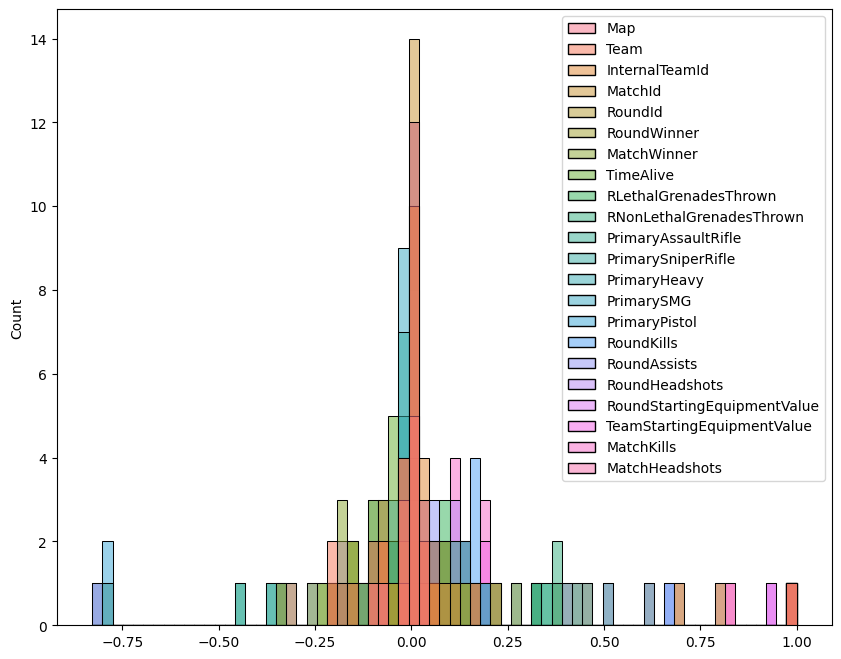

In [ ]:
# histograma para verificar la distribución y dispersión de los datos

sns.histplot(matriz_de_correlaciones)

 histograma para mostrar la distribución de los valores de correlación en la matriz de correlaciones. En el eje horizontal aparecen los valores de correlación, desde -1 a 1, mientras que el eje vertical indica la frecuencia de estos valores. La mayoría de las correlaciones están cercanas a 0, lo que sugiere relaciones débiles o inexistentes entre muchas variables. Este gráfico es útil para evaluar la cantidad de correlaciones fuertes (positivas o negativas) y guiar el análisis hacia las variables con mayor impacto.

<Axes: xlabel='RoundStartingEquipmentValue', ylabel='Count'>

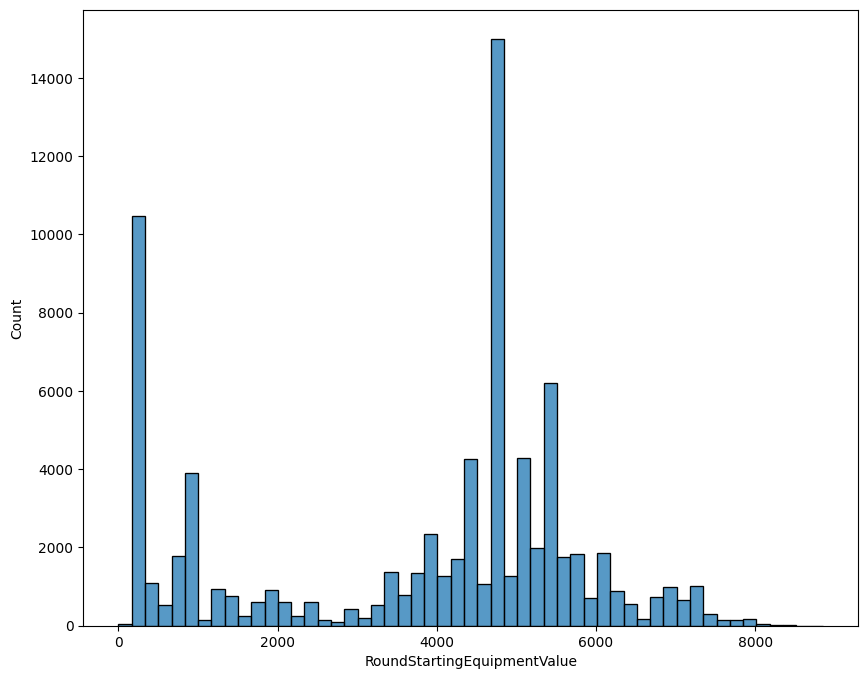

In [ ]:
# histograma para ver distribución de datos para variable "TeamStartingEquipmentValue"

sns.histplot(df3.RoundStartingEquipmentValue)

En este gráfico, el eje X representa los valores de esta variable, que corresponden al valor del equipo inicial en cada ronda, mientras que el eje Y muestra la frecuencia de esos valores.
El histograma revela patrones como las concentraciones o picos en ciertos rangos de valores. Por ejemplo, podrías notar que hay valores comunes alrededor de 1600, 4700 y 5200, que posiblemente reflejan estrategias o límites comunes en los datos del juego. Este tipo de visualización ayuda a identificar la dispersión, valores típicos y posibles sesgos en la distribución de la variable analizada.


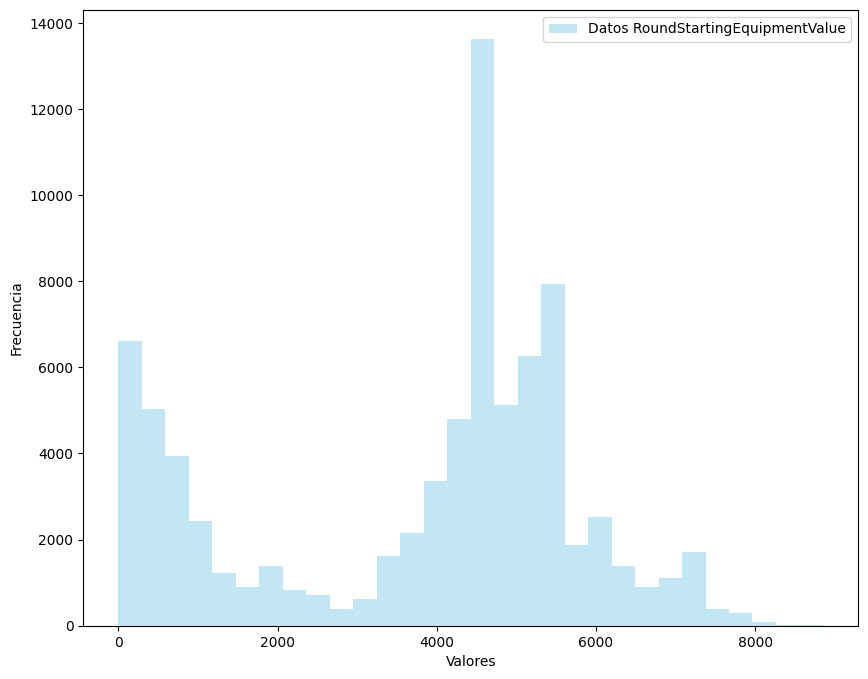

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
# data = np.random.normal(0, 1, 1000)

plt.hist(df3.RoundStartingEquipmentValue, bins=30, alpha=0.5, color='skyblue', label='Datos RoundStartingEquipmentValue')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El histograma permite visualizar cómo están distribuidos los valores iniciales de equipo por ronda. Los picos indican frecuencias altas en ciertos rangos. Por ejemplo, es posible que observes acumulaciones cerca de 1600, 4700 y 5200, que reflejan patrones comunes en los datos del juego. Esto es ideal para identificar sesgos o comportamientos recurrentes

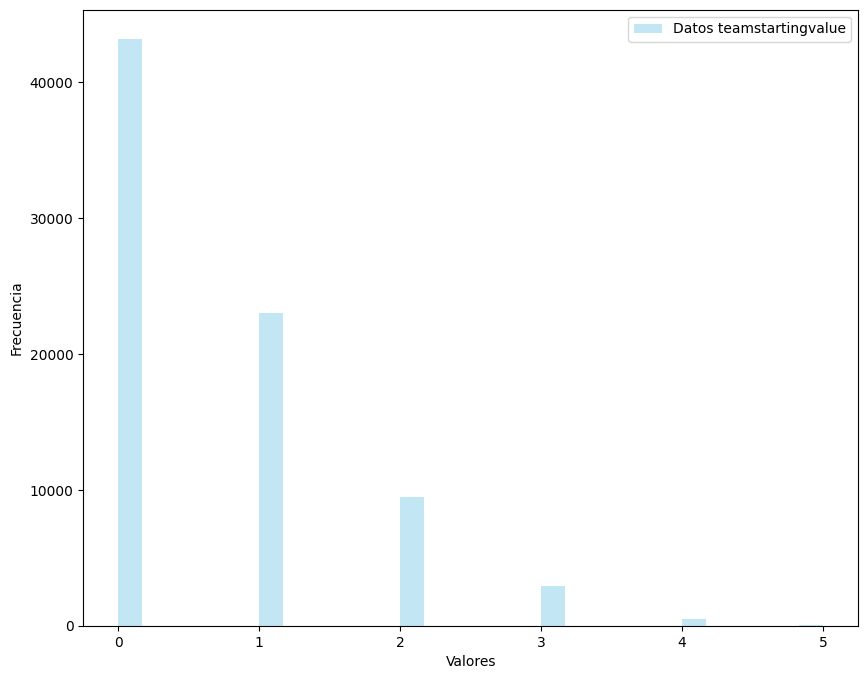

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
#data = np.random.normal(0, 1, 1000)

plt.hist(df3.RoundKills, bins=30, alpha=0.5, color='skyblue', label='Datos teamstartingvalue')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El histograma revela tendencias en los datos, como qué rangos de kills son los más comunes en las rondas, lo que puede ser útil para identificar patrones de desempeño. Si se observa un pico en el rango bajo, puede indicar una baja cantidad promedio de kills por ronda.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Skewness is nan


<Axes: xlabel='TeamStartingEquipmentValue', ylabel='Count'>

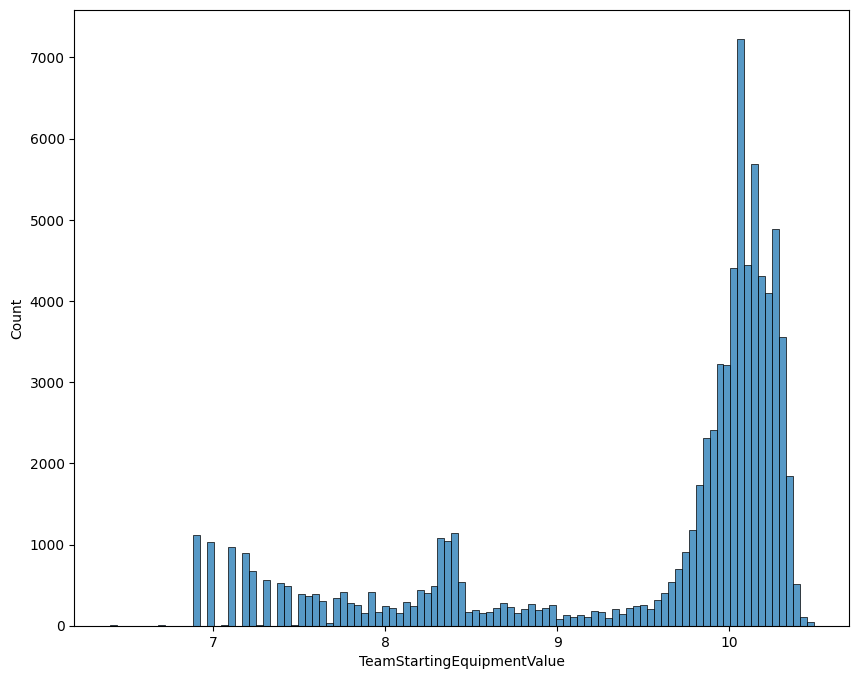

In [ ]:
# Vemos que la variable de destino TeamStartingEquipmentValuie tiene una distribución sesgada a la derecha.
# Tendremos que registrar la transformación de esta variable para que se distribuya normalmente.
# Una variable de destino distribuida normalmente (o casi normal) ayuda a modelar mejor la relación
# entre las variables de destino y las independientes.
# Además, los algoritmos lineales suponen una varianza constante en el término de error.
#
# Acercarnos más a una distribución normal
#

target = np.log(df3.TeamStartingEquipmentValue)
print ('Skewness is', target.skew())
sns.histplot(target)

transforma la variable TeamStartingEquipmentValue para acercar su distribución a una forma normal. Una distribución más cercana a la normal facilita la creación de modelos más precisos y cumple con los supuestos de muchos algoritmos lineales, como la constancia de la varianza en el término de error.
- Transformación logarítmica: Se aplica la función np.log() a los valores de TeamStartingEquipmentValue. Esto es útil para reducir la asimetría (sesgo) de la distribución, especialmente cuando está sesgada hacia la derecha.
- Evaluación de asimetría: target.skew() calcula el sesgo de la variable transformada. Un valor cercano a 0 indica que la distribución es aproximadamente simétrica.
- Visualización: El histograma generado con sns.histplot(target) muestra cómo se distribuyen los valores después de la transformación logarítmica. Esto permite verificar visualmente si la transformación logra una distribución más uniforme.

En resumen, este proceso mejora la capacidad del modelo para capturar relaciones entre las variables dependiente e independientes y garantiza un mejor ajuste en los análisis posteriores.


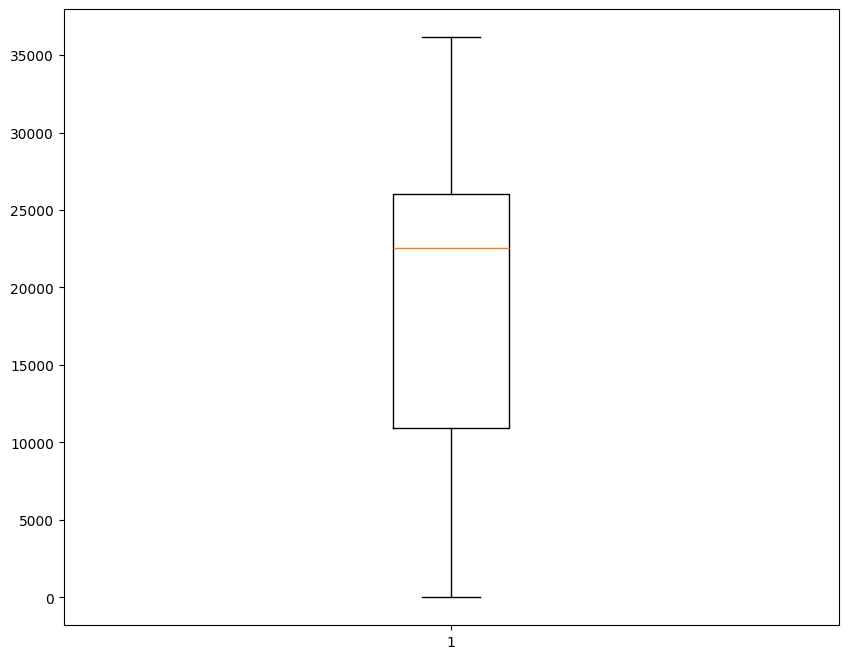

In [ ]:
# buscando datos atípicos

plt.boxplot(list(df3.TeamStartingEquipmentValue))
plt.show()

El diagrama de caja destaca:
- La mediana: Representada por la línea dentro de la caja, indicando el valor central de los datos.
- Rango intercuartílico (IQR): La caja muestra la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3), indicando la concentración de la mayoría de los valores.
- Bigotes: Extensiones que abarcan los valores dentro de 1.5 veces el IQR desde los cuartiles.
- Valores atípicos: Cualquier punto fuera de los bigotes sería considerado como un outlier. Sin embargo, en este caso no se detectan puntos fuera del rango de los bigotes.

Este tipo de gráfico es ideal para identificar datos extremos y analizar la dispersión de los valores, permitiéndote determinar si es necesario manejarlos antes del modelado o análisis.


In [ ]:
sp_pivot = df3.pivot_table(index='TeamStartingEquipmentValue', values='RoundWinner', aggfunc=np.median)
sp_pivot

<ipython-input-76-9f783721e6ab>:1: FutureWarning: The provided callable <function median at 0x781ac0667560> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sp_pivot = df3.pivot_table(index='TeamStartingEquipmentValue', values='RoundWinner', aggfunc=np.median)


,RoundWinner
TeamStartingEquipmentValue,
0,1.0
600,0.0
800,0.0
1000,1.0
1100,1.0
...,...
35050,1.0
35100,0.0
35450,0.0


## DESARROLLO DE HIPÓTESIS

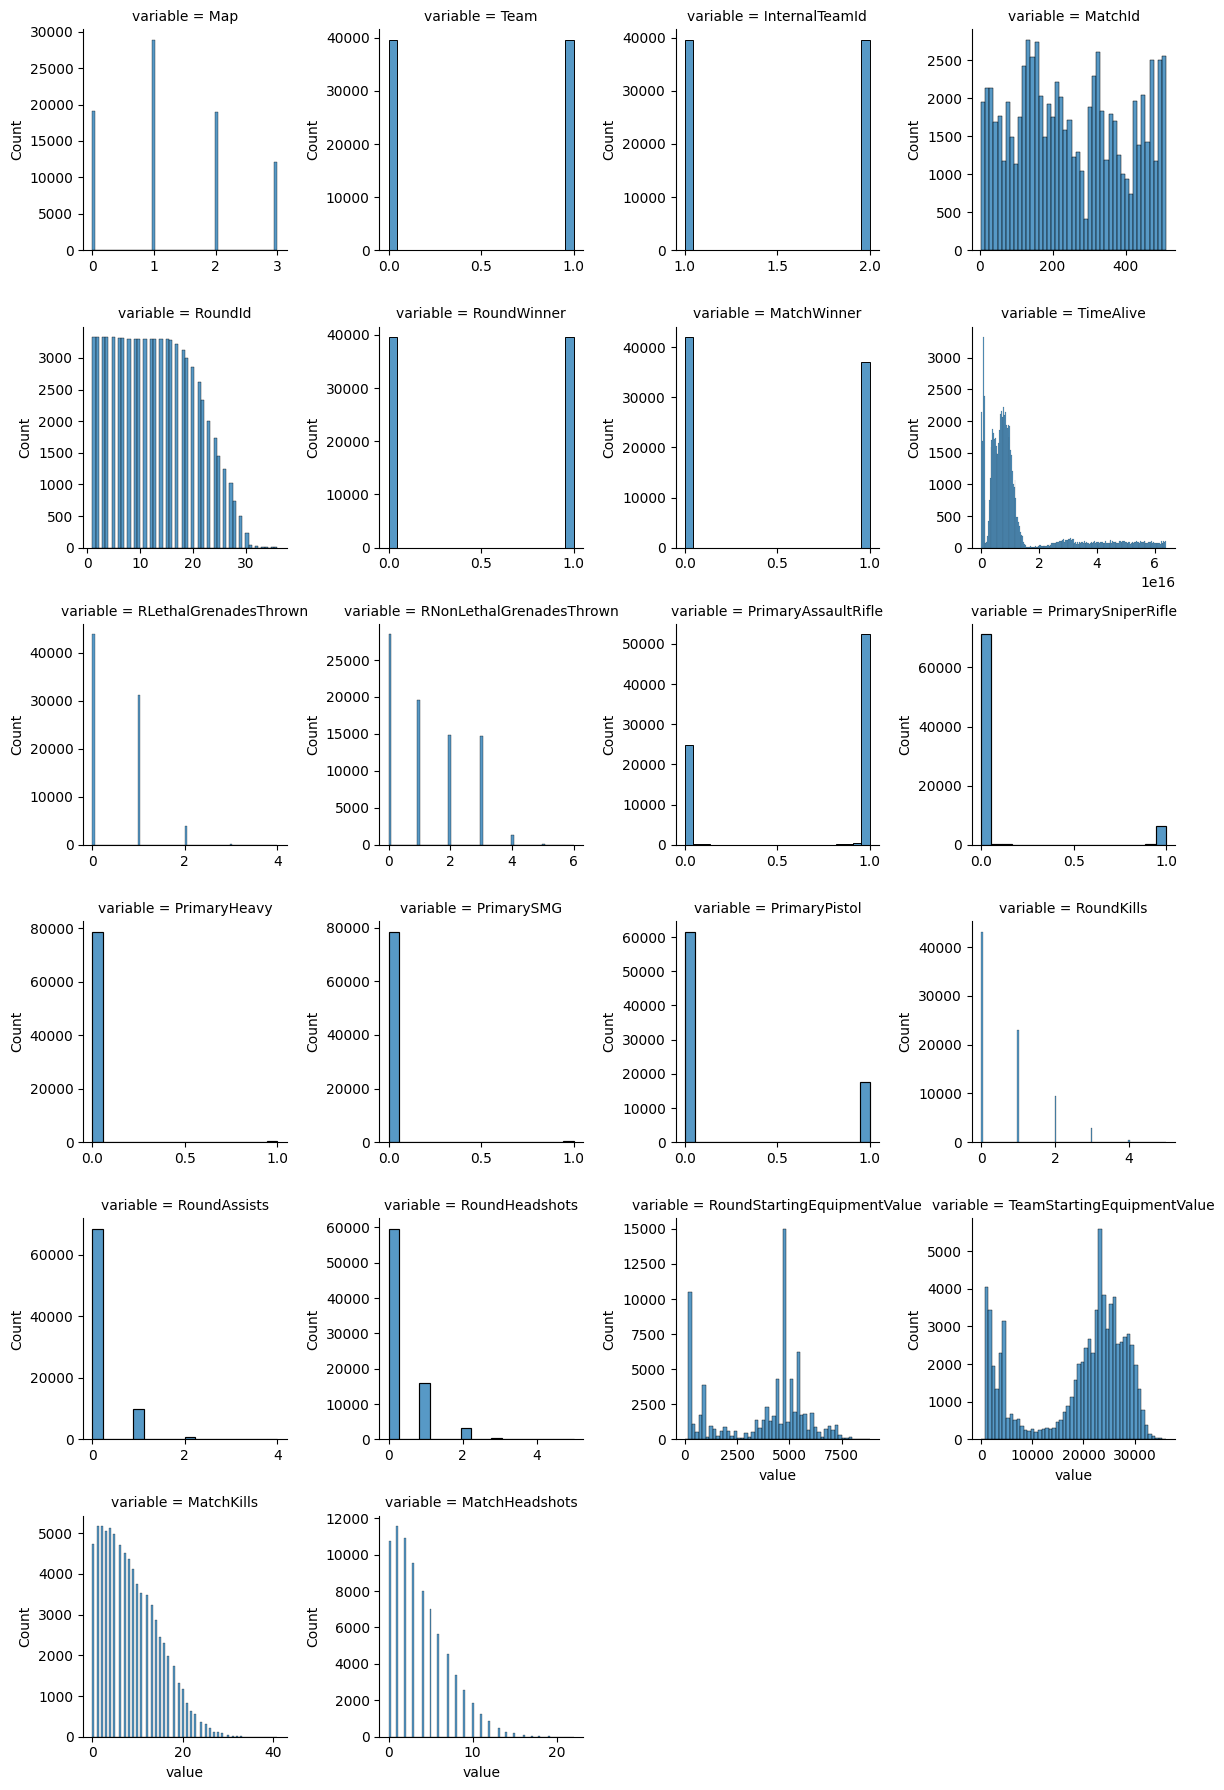

In [ ]:
num = [f for f in df3.columns if df3.dtypes[f] != 'object']
##num.remove('Id')
nd = pd.melt(df3, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

El resultado muestra, para cada valor de TeamStartingEquipmentValue, la mediana de los resultados de RoundWinner. Por ejemplo, un valor de 1.0 para RoundWinner indica que, en la mayoría de los casos, el equipo ganó la ronda correspondiente a ese valor de equipo inicial.
Este análisis facilita observar patrones en los valores del equipo inicial y la probabilidad de ganar rondas.


#### Hipótesis 1 (categórica): Los equipos con un valor inicial de equipamiento tienen una mayor probabilidad de ganar una ronda.

los equipos con un valor inicial de equipamiento (TeamStartingEquipmentValue) superior a un umbral específico (por ejemplo, 10,000) tienen una mayor probabilidad de ganar una ronda (RoundWinner = 1) en comparación con los equipos con menor inversión inicial.

#### Hipótesis 2 (de regresión): a mayor inversión inicial, mayor número de kills.

Existe una relación lineal positiva entre el valor inicial del equipamiento del equipo (TeamStartingEquipmentValue) y la cantidad total de kills por equipo en cada ronda (MatchKills). Es decir, a mayor inversión inicial, mayor número de kills.

<Axes: xlabel='TeamStartingEquipmentValue', ylabel='Count'>

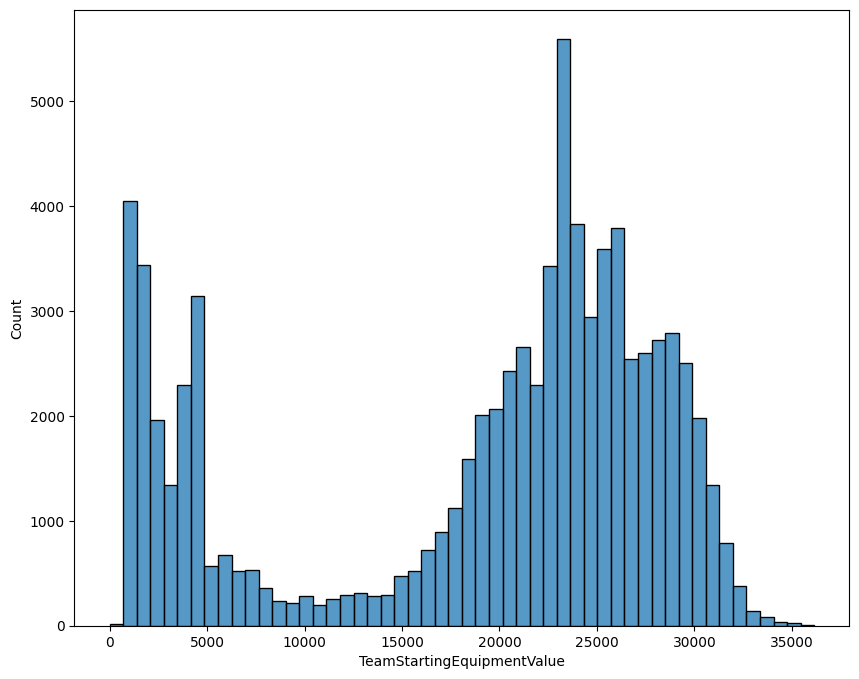

In [ ]:
# revisamos la distribución

sns.histplot(df3.TeamStartingEquipmentValue)

La distribución parece ser bimodal, con dos picos principales: uno en valores bajos, aproximadamente entre 0 y 5,000, y otro en valores más altos, entre 20,000 y 25,000. Esto sugiere que los equipos tienden a invertir en dos rangos de equipamiento inicial: bajo o alto, con menos ocurrencias en el rango intermedio. Analizar esta distribución puede ofrecer insights sobre la estrategia de los equipos y cómo puede afectar su desempeño en el juego.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Skewness is nan


<Axes: xlabel='TeamStartingEquipmentValue', ylabel='Count'>

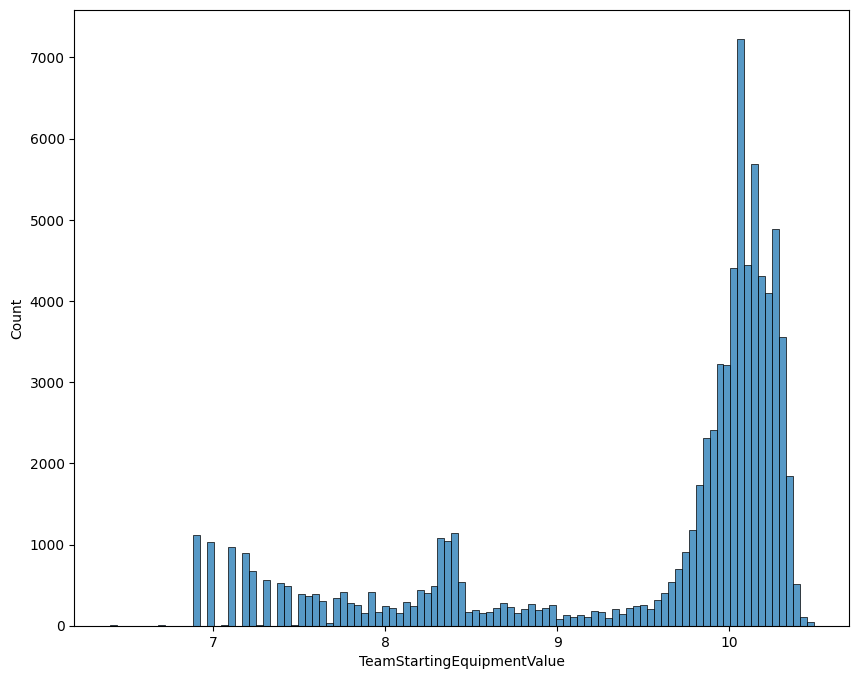

In [ ]:
target = np.log(df3['TeamStartingEquipmentValue'])
print ('Skewness is', target.skew())
sns.histplot(target)

realiza una transformación logarítmica sobre la variable TeamStartingEquipmentValue en el DataFrame df3. Esto es útil para reducir la asimetría en la distribución de los datos. Aquí está el proceso explicado:
- Transformación logarítmica: La línea target = np.log(df3['TeamStartingEquipmentValue']) aplica el logaritmo natural a cada valor de TeamStartingEquipmentValue. Esto reduce la influencia de valores extremos y acerca la distribución a una forma más simétrica.
- Calcular la asimetría: print('Skewness is', target.skew()) mide el grado de sesgo de la distribución. Un valor cercano a 0 indica que los datos son aproximadamente simétricos.
- Visualizar con histograma: sns.histplot(target) genera un histograma que muestra la distribución de los valores transformados. El eje X representa los valores después de la transformación logarítmica y el eje Y la frecuencia de cada valor. Tras la transformación, la mayoría de los datos se concentran en un rango más uniforme, lo que sugiere que la transformación fue efectiva.

Este proceso es especialmente valioso para preparar datos antes de aplicarlos a modelos que asumen normalidad en la variable dependiente.


In [ ]:
df3.query('MatchHeadshots > 12')

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,TimeAlive,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchHeadshots
215,1,1,2,4,22,1,0,1.117512e+16,1,3,...,0.0,0.0,0,2,1,2,4700,23500,19,13
225,1,1,2,4,23,0,0,9.510744e+15,1,3,...,0.0,0.0,0,2,0,2,4700,23500,21,15
582,1,0,1,9,20,0,0,4.403314e+15,1,1,...,0.0,0.0,0,2,0,2,5500,26400,15,13
592,1,0,1,9,21,1,0,7.687036e+15,1,3,...,0.0,0.0,0,2,0,1,5500,26400,17,14
597,1,1,2,9,21,0,1,1.007633e+16,1,3,...,0.0,0.0,0,3,1,2,4700,23200,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79092,1,1,2,510,29,1,0,9.332972e+15,0,3,...,0.0,0.0,0,0,0,0,4400,22300,26,15
79096,1,1,2,510,29,1,0,9.201610e+15,0,3,...,0.0,0.0,0,0,0,0,4400,22300,20,13
79101,1,0,1,510,30,0,0,5.973853e+15,1,1,...,0.0,0.0,0,3,0,2,5600,29000,20,13
79102,1,1,2,510,30,1,0,3.815759e+16,0,0,...,0.0,0.0,0,1,0,0,3050,15850,27,15


El resultado muestra un subconjunto del DataFrame con estas filas filtradas, manteniendo las mismas columnas que el DataFrame original. Por ejemplo:
- El equipo con TeamStartingEquipmentValue de 23,500 logró 13 y 15 headshots en diferentes instancias.
- Las filas también incluyen información adicional como MatchKills, RoundWinner y más, lo que permite realizar análisis más detallados, como relacionar los headshots con otros factores como el valor del equipo inicial o el número total de kills en una partida.

Esta consulta es útil para identificar casos sobresalientes o excepcionales dentro de los datos, y puede ayudar a estudiar patrones asociados con un desempeño superior en términos de headshots.


In [ ]:
# Variables en función de su correlación con la variable de destino.
# Separaremos las variables numéricas y categóricas y exploraremos estos datos desde un ángulo diferente.
#
numeric_data = df3.select_dtypes(include=[np.number])
cat_data = df3.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en los datos de entrenamiento".format(numeric_data.shape[1],cat_data.shape[1]))


Hay 22 columnas numéricas y 0 columnas categóricas en los datos de entrenamiento


Esto confirma que todos los datos disponibles en df3 son numéricos, lo que simplifica el análisis estadístico y el modelado, ya que no es necesario convertir variables categóricas en esta etapa. Es un paso preliminar importante para organizar los datos antes de aplicar técnicas analíticas


<Axes: >

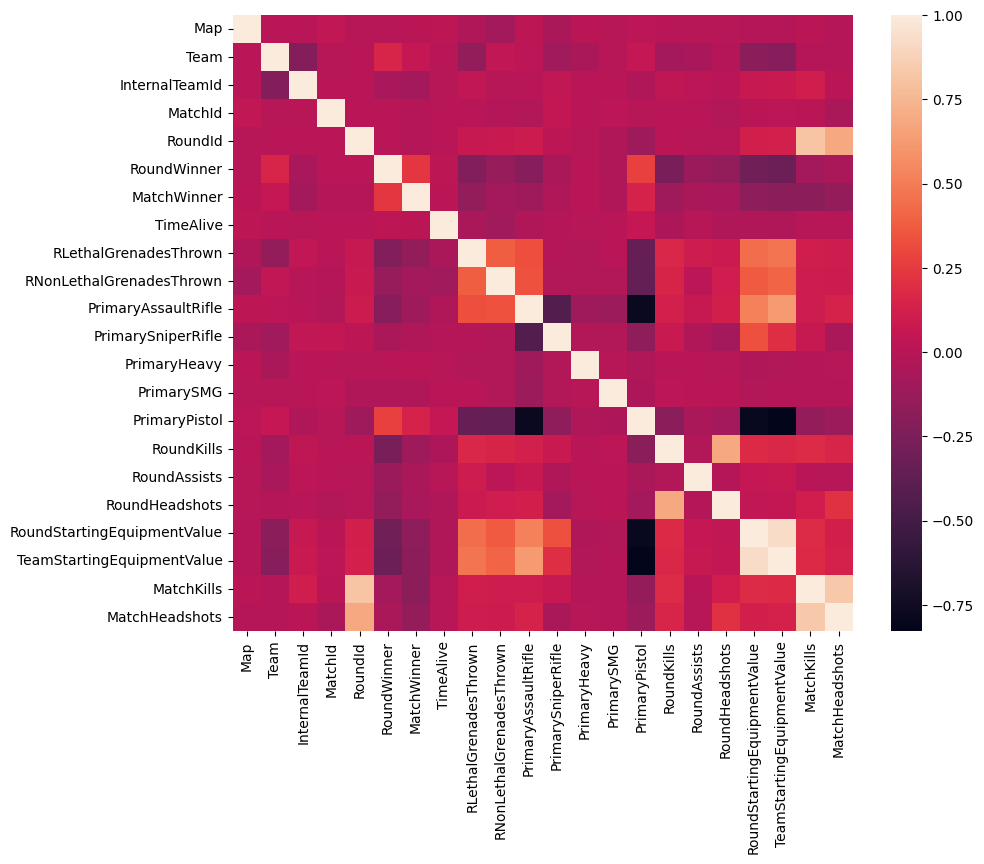

In [ ]:
corr = numeric_data.corr()
sns.heatmap(corr)

calcula la matriz de correlación de las columnas numéricas del DataFrame numeric_data utilizando numeric_data.corr() y visualiza los resultados con un heatmap (mapa de calor).
- Matriz de correlación: Representa las relaciones lineales entre pares de columnas numéricas. Los valores oscilan entre -1 y 1:- 1: Correlación positiva perfecta (cuando una variable aumenta, la otra también).
- -1: Correlación negativa perfecta (cuando una variable aumenta, la otra disminuye).
- 0: No hay correlación lineal.

- sns.heatmap(corr): Muestra estas correlaciones como un gráfico de colores:- Colores claros (cercanos a amarillo) representan correlaciones positivas fuertes.
- Colores oscuros (cercanos a morado) representan correlaciones negativas fuertes.
- Tonos intermedios (gris o neutro) indican correlaciones débiles o nulas.


El heatmap ayuda a identificar visualmente variables con correlaciones significativas, que pueden ser útiles para eliminar redundancias o seleccionar características importantes para modelado. Si identificas fuertes correlaciones positivas o negativas, estas podrían destacar relaciones relevantes entre tus datos


In [ ]:

print (corr['MatchHeadshots'].sort_values(ascending=False)[:15], '\n') #primeros 15 valores
print ('----------------------')
print (corr['MatchHeadshots'].sort_values(ascending=False)[-5:]) # últimos 5 valores

MatchHeadshots                 1.000000
MatchKills                     0.831445
RoundId                        0.688210
RoundHeadshots                 0.213804
RoundKills                     0.152591
PrimaryAssaultRifle            0.142616
TeamStartingEquipmentValue     0.132261
RoundStartingEquipmentValue    0.116395
RLethalGrenadesThrown          0.092959
RNonLethalGrenadesThrown       0.092516
InternalTeamId                 0.008845
RoundAssists                  -0.000825
TimeAlive                     -0.004109
PrimaryHeavy                  -0.004697
Map                           -0.012509
Name: MatchHeadshots, dtype: float64 

----------------------
MatchId              -0.052418
PrimarySniperRifle   -0.057635
RoundWinner          -0.064040
PrimaryPistol        -0.116428
MatchWinner          -0.149794
Name: MatchHeadshots, dtype: float64


#### Interpretación de correlación

|Variable|correlación|descripción|
|--|--|--|
|MatchHeadshots                 |1.000000|Correlación directa perfecta|
|MatchKills                     |0.831445|Correlación directa |
|RoundHeadshots                 |0.213804|No hay mucha correlación, pero encontramos una correlación directa|
|RoundKills                    | 0.152591||
|PrimaryAssaultRifle          |  0.142616||
|TeamStartingEquipmentValue  |   0.132261||
|RoundStartingEquipmentValue|    0.116395||
|RLethalGrenadesThrown    |      0.092959||
|RNonLethalGrenadesThrown|       0.092516||
|InternalTeamId |                0.008845||
|RoundAssists  |                -0.000825||
|TimeAlive    |                 -0.004109||
|PrimaryHeavy|                  -0.004697||
|Map      |                     -0.012509||
|PrimarySMG|                    -0.016266|existe una correlación indirecta|

## CONCLUSIÓN

Durante el desarrollo de este proyecto se llevaron a cabo las tres primeras fases de la metodología CRISP-DM, fundamentales para establecer una base sólida de análisis.

En la fase de Comprensión del Negocio, se identificaron los objetivos principales del proyecto y se tradujeron en metas de minería de datos, asegurando una alineación clara entre el análisis de datos y las necesidades del negocio.

Posteriormente, en la fase de Comprensión de los Datos, se exploró detalladamente la estructura y calidad del conjunto de datos disponible. El Análisis Exploratorio de Datos (EDA) permitió detectar patrones, anomalías y relaciones entre variables, generando hipótesis valiosas para la fase de modelado.

Finalmente, en la fase de Preparación de los Datos, se llevaron a cabo procesos de limpieza, transformación y selección de variables, con el objetivo de construir un dataset robusto y representativo para las etapas posteriores de modelado y evaluación.

Este trabajo proporciona una base sólida para continuar con el modelado predictivo y garantiza que las decisiones futuras estarán sustentadas en un entendimiento profundo de los datos.